# Programming Assignment 1
* CSCI-4930/5930 ML Spring 2019  (Be sure to discard which section you are not enrolled)
* Author: Ashis Biswas (Replace my name with yours)

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import kurtosis, skew, pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from statistics import mean, stdev

### TASK 2: Load the dataset into memory so that you can play with it here

In [100]:
dataset = pd.read_csv('baby-weights-dataset2.csv')
print(dataset.shape)
dataset

(101400, 37)


,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60,13,20,12,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
5,2006,1,1,21,30,15,21,12,13,1,...,0,0,0,0,0,0,0,0,0,8.0000
6,2007,1,2,29,20,11,32,6,6,2,...,0,0,0,0,0,0,0,0,0,7.0000
7,2008,2,2,23,41,15,21,13,13,1,...,0,0,0,0,0,0,0,0,0,7.3750
8,2009,2,1,27,0,12,26,10,13,1,...,0,0,0,0,0,0,0,0,0,8.1875
9,2010,1,1,30,30,10,22,12,14,3,...,0,0,0,0,0,0,0,0,0,7.0625


### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [101]:
bweight = dataset["BWEIGHT"]
print(bweight.describe())

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64


### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


(array([3.5400e+02, 7.1600e+02, 1.3150e+03, 4.4330e+03, 1.8413e+04,
        4.5371e+04, 2.6142e+04, 4.2550e+03, 3.7100e+02, 3.0000e+01]),
 array([ 0.1875,  1.475 ,  2.7625,  4.05  ,  5.3375,  6.625 ,  7.9125,
         9.2   , 10.4875, 11.775 , 13.0625]),
 <a list of 10 Patch objects>)

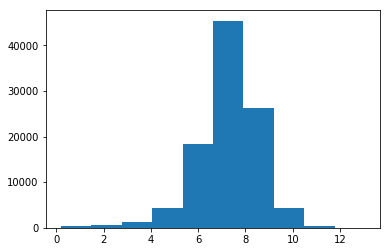

In [102]:
plt.hist(bweight)



### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [103]:
skewness = skew(bweight)
kurtosis = kurtosis(bweight)
print("skewness is %f " % skewness)
print("kurtosis is %f " % kurtosis)






skewness is -0.936580 
kurtosis is 2.868579 


### TASK 6: Tackle the dummy categorical variables by introducing dummy variables

In [104]:
def dummy_variable(var):
    dummy_var = []
    for y in var:
        #C:Cubans = 1, M:Mexicans = 2,  N:No = 3, O:Colombians = 4,
        #P:Peruvians = 5, S:Salvadorans = 6, U:Guatemalans = 7
        if y == 'C':
            dummy_var.append(1)
        if y == 'M':
            dummy_var.append(2)
        if y == 'N':
            dummy_var.append(3)
        if y == 'O':
            dummy_var.append(4)
        if y == 'P':
            dummy_var.append(5)
        if y == 'S':
            dummy_var.append(6)
        if y == 'U':
            dummy_var.append(7)
    return dummy_var

hispmom = dataset.HISPMOM
#create dummy variable
dummy_mom = []
dummy_mom = dummy_variable(hispmom)

hispdad = dataset.HISPDAD
#create dummy variable
dummy_dad = []
dummy_dad = dummy_variable(hispdad)

### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [105]:
for column in dataset:
    print("{}: {}".format(column, dataset[column].isnull().sum()))
    
# there is no missing data
    

ID: 0
SEX: 0
MARITAL: 0
FAGE: 0
GAINED: 0
VISITS: 0
MAGE: 0
FEDUC: 0
MEDUC: 0
TOTALP: 0
BDEAD: 0
TERMS: 0
LOUTCOME: 0
WEEKS: 0
RACEMOM: 0
RACEDAD: 0
HISPMOM: 0
HISPDAD: 0
CIGNUM: 0
DRINKNUM: 0
ANEMIA: 0
CARDIAC: 0
ACLUNG: 0
DIABETES: 0
HERPES: 0
HYDRAM: 0
HEMOGLOB: 0
HYPERCH: 0
HYPERPR: 0
ECLAMP: 0
CERVIX: 0
PINFANT: 0
PRETERM: 0
RENAL: 0
RHSEN: 0
UTERINE: 0
BWEIGHT: 0


### TASK 8: Do variable selection from the pool of 36 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

In [106]:
training_var = []
for column in dataset:
    #no need to find correlation score of bweight because bweight is the target value  
    if column == "BWEIGHT":
        break
    if column == "HISPMOM":
        #use hispmom dummy variable instead of string values
        if abs(pearsonr(bweight, dummy_mom)[0]) > 0.1:
            training_var.append(column)
        continue
    if column == "HISPDAD":
        #use hispdad dummy variable instead of string values   
        if abs(pearsonr(bweight, dummy_dad)[0]) > 0.1:
            training_var.append(column)
        continue
    if abs(pearsonr(bweight, dataset[column])[0]) > 0.1:
        training_var.append(column)


print(training_var)



['MARITAL', 'GAINED', 'VISITS', 'WEEKS', 'HYPERPR']


### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [107]:
#X variables are the selected variables from the pool
X = dataset[training_var]
y = dataset["BWEIGHT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

,MARITAL,GAINED,VISITS,WEEKS,HYPERPR
73019,2,15,15,41,0
33846,1,48,12,36,0
93582,2,25,12,41,0
1489,1,30,13,39,0
96160,1,32,10,43,0
81914,1,35,12,34,0
13944,2,20,8,42,0
43875,1,20,12,38,0
15274,1,20,12,41,0
71830,1,35,12,37,0


### TASK 9.2: On the training dataset, apply a normalization technique

In [108]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)


X_train_minmax

c:\users\wkgns\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.15306122, 0.30612245, 0.85185185, 0.        ],
       [0.        , 0.48979592, 0.24489796, 0.66666667, 0.        ],
       [1.        , 0.25510204, 0.24489796, 0.85185185, 0.        ],
       ...,
       [0.        , 0.20408163, 0.40816327, 0.74074074, 0.        ],
       [0.        , 0.40816327, 0.24489796, 0.7037037 , 0.        ],
       [0.        , 0.30612245, 0.28571429, 0.7037037 , 1.        ]])

### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [109]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.        , 0.30612245, 0.18367347, 0.2962963 , 1.        ],
       [0.        , 0.33673469, 0.18367347, 0.81481481, 0.        ],
       [0.        , 0.39795918, 0.26530612, 0.77777778, 0.        ],
       ...,
       [0.        , 0.37755102, 0.        , 0.77777778, 0.        ],
       [0.        , 0.40816327, 0.24489796, 0.77777778, 0.        ],
       [1.        , 0.30612245, 0.16326531, 0.7037037 , 0.        ]])

### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [110]:

#Closed-Form
# (XT X)^-1 (XTY)
closed_form_w = np.dot(np.dot(inv(np.dot(X_train_minmax.T, X_train_minmax)), X_train_minmax.T) , y_train)
print("Closed Form: {}".format(closed_form_w))
#Gradient Descent
def gradientDescent(X, y, w, alpha, num_iters):
    m = y.size
    for i in range(num_iters):
        x12 = np.squeeze(np.asarray(X))
        w12 = np.squeeze(np.asarray(w))
        y_hat = np.dot(x12, w12)
        
        w = w - alpha * (1.0/m) * np.dot(np.transpose(X), y_hat-y)
    return w

#initialize theta as an array of zeros
w = np.zeros([1, len(X_train_minmax[0])])
#learning rate
alpha = 0.5
num_iters = 10000
gdw = gradientDescent(X_train_minmax, y_train, w, alpha, num_iters)
print("Gradient Descent Batch: {}".format(gdw))

Closed Form: [-0.24283647  1.26022813  0.87862437  8.75620237 -0.32191532]
Gradient Descent Batch: [[-0.24283647  1.26022813  0.87862437  8.75620237 -0.32191532]]


### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [111]:
# hypothesis = wT * X 
#closed form hypothesis
#cannot use transpose on 1d array so I used a different method
cfw_T = closed_form_w.reshape(-1, 1)
cf_hx = np.dot(np.squeeze(np.asarray(X_test_minmax)), cfw_T)
#root mean squared error
cf_rms = sqrt(mean_squared_error(y_test, cf_hx))
print("Root mean squared error of closed form: {}".format(cf_rms))

# gradient descent hypothesis
gdw_T = gdw.reshape(-1, 1)
gd_hx = np.dot(np.squeeze(np.asarray(X_test_minmax)), gdw_T)
#root mean squared error
gd_rms = sqrt(mean_squared_error(y_test, gd_hx))
print("Root mean squared error of gradient descent algorithm: {}".format(gd_rms))


Root mean squared error of closed form: 1.086291244132369
Root mean squared error of gradient descent algorithm: 1.0862912441323689


### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [112]:
# First trial 
# Root mean squared error of closed form: 1.0820059891963298
# Root mean squared error of gradient descent algorithm: 1.0820108928448322

# Second trial 
#Root mean squared error of closed form: 1.0861723697625694
#Root mean squared error of gradient descent algorithm: 1.0861775421967483

# Third trial 
# Root mean squared error of closed form: 1.0867635514926446
# Root mean squared error of gradient descent algorithm: 1.08676213559692

# Fourth trial 
# Root mean squared error of closed form: 1.0680325040224257
# Root mean squared error of gradient descent algorithm: 1.0680318573350027

# Fifth trial 
# Root mean squared error of closed form: 1.0749792185786997
# Root mean squared error of gradient descent algorithm: 1.0749866212129882

### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [115]:
# average RMSE of gradient descent 
RMSE = [1.0820108928448322, 1.0861775421967483, 1.08676213559692, 1.0680318573350027, 1.0749866212129882]
Average_RMSE_test = mean(RMSE)
print("Average RMSE: {}".format(Average_RMSE_test))
# standard deviation of gradient descent
stdev_RMSE_test = stdev(RMSE)
print("Standard deviation: {}".format(stdev_RMSE_test))

print("RMSE(testing) = {} ± {}".format(Average_RMSE_test, stdev_RMSE_test))



Average RMSE: 1.0795938098372984
Standard deviation: 0.007991834096869526
RMSE(testing) = 1.0795938098372984 ± 0.007991834096869526


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [116]:
X = dataset[training_var]
y_whole = dataset["BWEIGHT"]

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

#initialize theta as an array of zeros
w = np.zeros([1, len(X_train_minmax[0])])
#learning rate
alpha = 0.1
num_iters = 10000
gdw = gradientDescent(X_minmax, y_whole, w, alpha, num_iters)

# gradient descent hypothesis
gdw_T = gdw.reshape(-1, 1)
gd_hx = np.dot(np.squeeze(np.asarray(X_minmax)), gdw_T)
#root mean squared error
gd_rms = sqrt(mean_squared_error(y_whole, gd_hx))
print("Root mean squared error of gradient descent algorithm: {}".format(gd_rms))



c:\users\wkgns\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Root mean squared error of gradient descent algorithm: 1.0783341816331256


### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [117]:
judge = pd.read_csv('judge-without-labels.csv')
# selected variables
judge_variables = judge[training_var]
# normalize judge-without-labels.csv
min_max_scaler = preprocessing.MinMaxScaler()
judge_minmax = min_max_scaler.fit_transform(judge_variables)
# w``
w_T = gdw_T

c:\users\wkgns\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [118]:


judge_BWEIGHT = np.dot(np.squeeze(np.asarray(judge_minmax)), w_T)
result = DataFrame.from_records(judge_BWEIGHT)
result.columns=['BWEIGHT']
result['ID'] = judge['ID'] 
result = result[['ID', 'BWEIGHT']]
export_csv = result.to_csv (r'D:\Machine Learning\PA1\judge-submission-run-3.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

print(result)


        ID   BWEIGHT
0        0  6.992623
1        1  8.013980
2        2  7.211015
3        3  7.314721
4        4  6.951169
5        5  7.351432
6        6  6.722034
7        7  7.240645
8        8  8.363020
9        9  6.434705
10      10  8.036638
11      11  7.473392
12      12  7.746480
13      13  7.407798
14      14  4.853008
15      15  6.768330
16      16  7.515690
17      17  7.147270
18      18  6.264534
19      19  7.823531
20      20  7.702061
21      21  7.177009
22      22  8.011113
23      23  7.790844
24      24  7.325241
25      25  8.072602
26      26  6.693043
27      27  7.298397
28      28  7.750693
29      29  7.755069
...    ...       ...
1971  1971  6.828607
1972  1972  7.420574
1973  1973  7.384502
1974  1974  7.676807
1975  1975  6.042226
1976  1976  6.504675
1977  1977  8.733300
1978  1978  5.987260
1979  1979  7.403611
1980  1980  7.253952
1981  1981  7.682952
1982  1982  7.458685
1983  1983  7.361205
1984  1984  7.169437
1985  1985  5.859128
1986  1986  7

# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).